# **Bank Customer Churn Prediction**

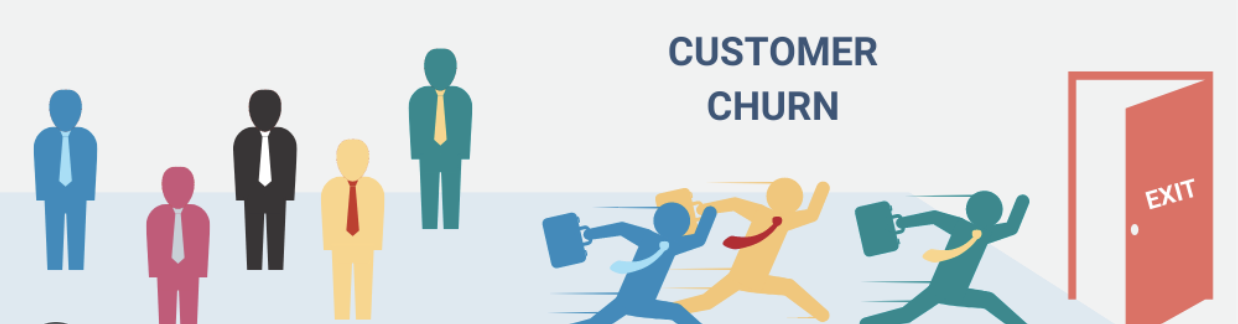

In the banking industry, it is important to predict and understand when customers might decide to end their relationship with the bank, known as customer churn. When customers leave, it can lead to financial losses and impact the bank's reputation.By identifying customers who are likely to churn, the bank can proactively take measures to retain them and minimize revenue loss.Therefore, the goal of this project is to develop a system that can accurately predict customer churn in order to take proactive steps to retain these customers.

We will predict a customer churn based on their information. The dataset contains 13 columns:
* RowNumber: Row number for the row in the data table.
* CustomerId: Unique Identification number of the customer.
* Surname: Surname (Lastname) of the customer.
* CreditScore: Credit Score of the customer.
* Geography: The country where the customer resides (France, Spain or Germany).
* Gender: Gender of the customer (Male / Female).
* Age: Age of the customer.
* Tenure: Number of years the customers has been associated with the bank.
* Balance: The amount of balance in the customer's account.
* NumOfProducts: Number of bank product facilities customer is uses (e.g., savings account, credit card).
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

In [ ]:
!pip install kaggle

In [ ]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [1]:
# importing dataset
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

Dataset URL: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction
License(s): other
  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 56.6MB/s]


In [2]:
from zipfile import ZipFile
dataset = '/content/bank-customer-churn-prediction.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

bank-customer-churn-prediction.zip  Churn_Modelling.csv  sample_data


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load and Understand  Data

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Exploratory Data Analysis

In [ ]:
# Categorical Variables
df['Exited'].value_counts(normalize=True)*100

,proportion
Exited,
0,79.63
1,20.37


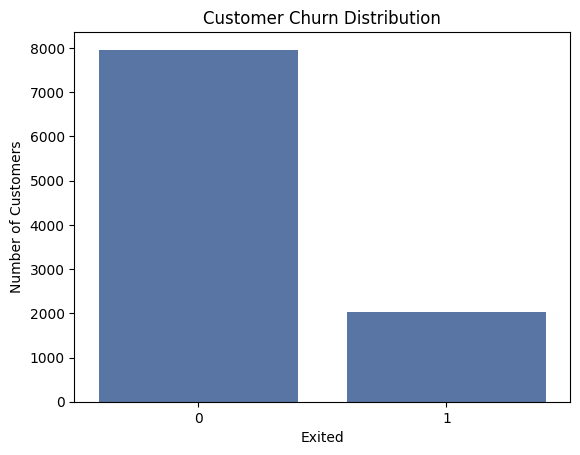

In [ ]:
# distribution plot
sns.set_palette('deep')

sns.countplot(data=df, x='Exited')

plt.xlabel('Exited')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()

In [ ]:
# Geography
df['Geography'].value_counts(normalize=True)*100

,proportion
Geography,
France,50.14
Germany,25.09
Spain,24.77


In [ ]:
#Distribution of Customer Churn in different Geographies
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

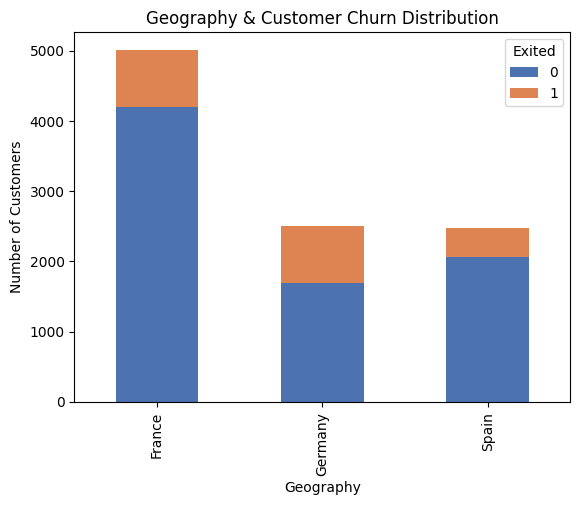

In [ ]:
# plot
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', stacked=True)
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Geography & Customer Churn Distribution')
plt.show()

In [ ]:
# Gender
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,54.57
Female,45.43


In [ ]:
df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: proportion, dtype: float64

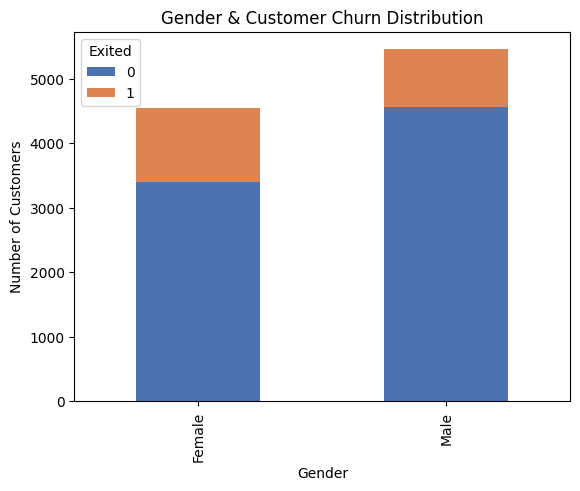

In [ ]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar',stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender & Customer Churn Distribution')
plt.show()

In [ ]:
# Tenure
print(df['Tenure'].describe())
print('---------------------------------')
print(df['Tenure'].value_counts(normalize=True).mul(100))

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
---------------------------------
Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: proportion, dtype: float64


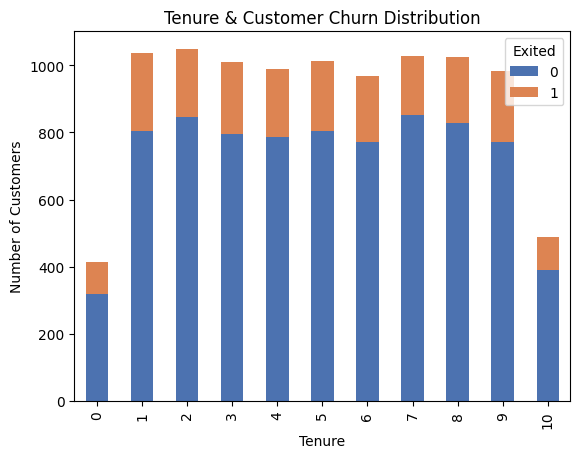

In [ ]:
pd.crosstab(df['Tenure'],df['Exited']).plot(kind='bar',stacked=True)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure & Customer Churn Distribution')
plt.show()

In [ ]:
# Number of Products
print(df['NumOfProducts'].describe())
print('------------------------------------')
print(df['NumOfProducts'].value_counts().sort_index())
print('-------------------------------------')
print(round(df.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).mul(100),2))

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64
------------------------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
-------------------------------------
NumOfProducts  Exited
1              0          72.29
               1          27.71
2              0          92.42
               1           7.58
3              1          82.71
               0          17.29
4              1         100.00
Name: proportion, dtype: float64


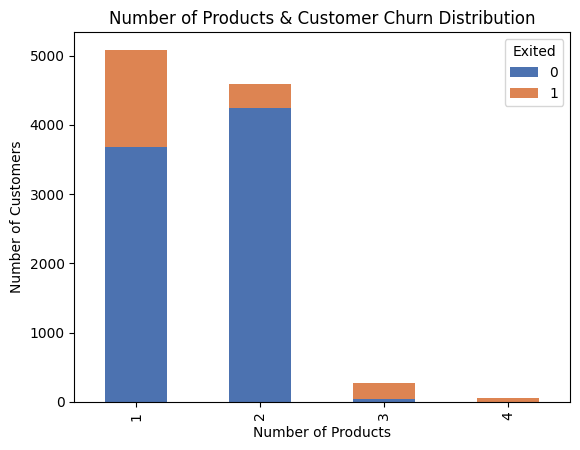

In [ ]:
pd.crosstab(df['NumOfProducts'],df['Exited']).plot(kind='bar',stacked=True)
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.title('Number of Products & Customer Churn Distribution')
plt.show()

In [ ]:
# Has Credit Card
print(df['HasCrCard'].describe())
print('-----------------------------------')
print(df['HasCrCard'].value_counts().sort_index())
print('-----------------------------------')
print(round(df.groupby('HasCrCard')['Exited'].value_counts(normalize=True),2))

count    10000.00000
mean         0.70550
std          0.45584
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: HasCrCard, dtype: float64
-----------------------------------
HasCrCard
0    2945
1    7055
Name: count, dtype: int64
-----------------------------------
HasCrCard  Exited
0          0         0.79
           1         0.21
1          0         0.80
           1         0.20
Name: proportion, dtype: float64


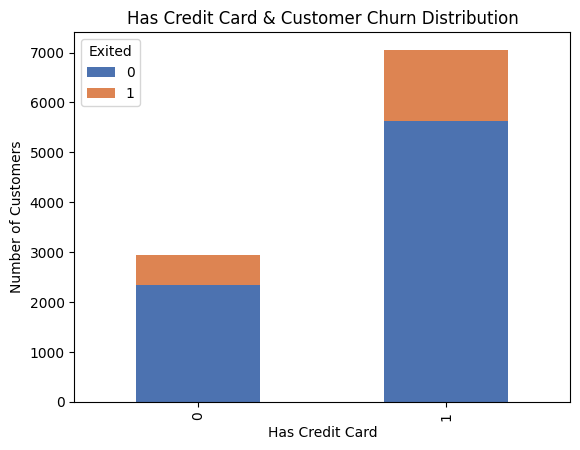

In [ ]:
pd.crosstab(df['HasCrCard'],df['Exited']).plot(kind='bar',stacked=True)
plt.xlabel('Has Credit Card')
plt.ylabel('Number of Customers')
plt.title('Has Credit Card & Customer Churn Distribution')
plt.show()

In [ ]:
#Is Active Member
print(df['IsActiveMember'].describe())
print('------------------------------------')
print(df['IsActiveMember'].value_counts().sort_index())
print('-------------------------------------')
print(round(df.groupby('IsActiveMember')['Exited'].value_counts(normalize=True),2))

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: IsActiveMember, dtype: float64
------------------------------------
IsActiveMember
0    4849
1    5151
Name: count, dtype: int64
-------------------------------------
IsActiveMember  Exited
0               0         0.73
                1         0.27
1               0         0.86
                1         0.14
Name: proportion, dtype: float64


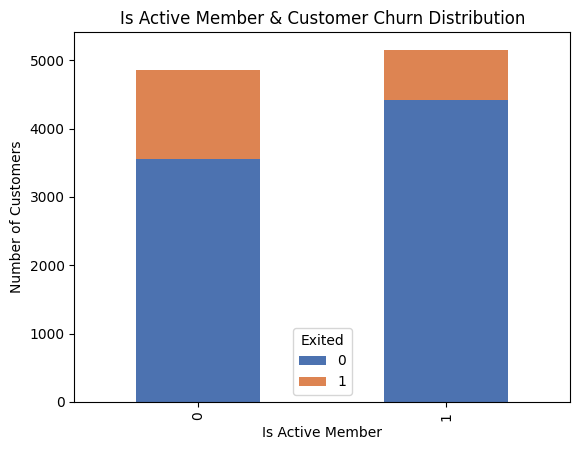

In [ ]:
pd.crosstab(df['IsActiveMember'],df['Exited']).plot(kind='bar',stacked=True)
plt.xlabel('Is Active Member')
plt.ylabel('Number of Customers')
plt.title('Is Active Member & Customer Churn Distribution')
plt.show()

Numerical Variables


In [ ]:
#Credit Score
print(df['CreditScore'].describe())
print('-----------------------------------')
print(df['CreditScore'].value_counts())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
-----------------------------------
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64


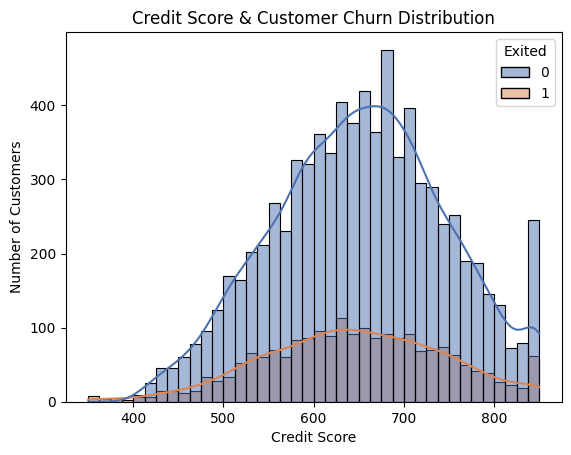

In [ ]:
sns.histplot(df, x='CreditScore', hue='Exited', kde=True, bins=40)
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Credit Score & Customer Churn Distribution')
plt.show()

In [ ]:
# Age
print(df['Age'].describe())
print('-----------------------------------')
print(df['Age'].value_counts())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
-----------------------------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64


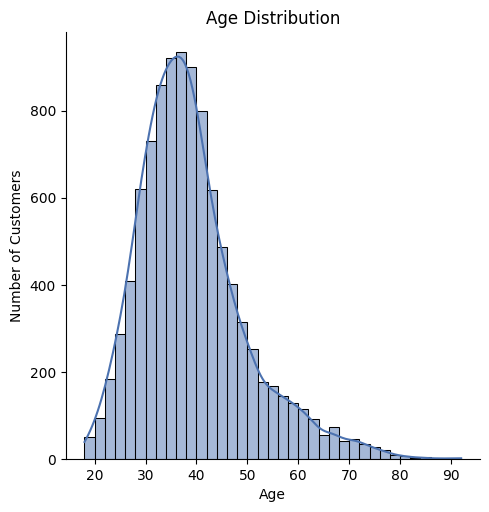

In [ ]:
sns.displot(df, x='Age', kde=True, bins=37)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution')
plt.show()

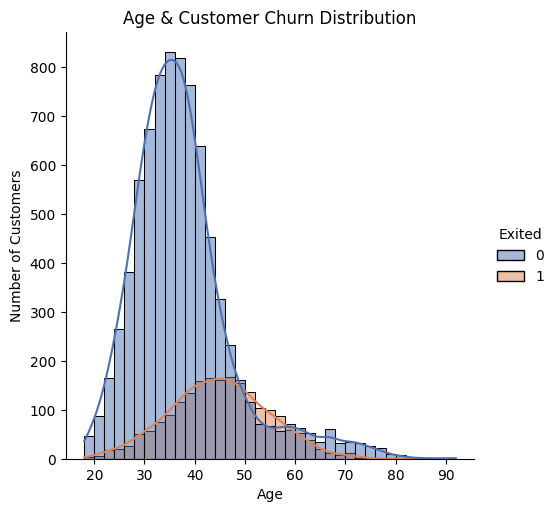

In [ ]:
sns.displot(df, x='Age', hue='Exited', kde=True, bins=37)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age & Customer Churn Distribution')
plt.show()

In [ ]:
# Balance
print(df['Balance'].describe())
print('-----------------------------------')
print(df['Balance'].value_counts().sort_index())

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
-----------------------------------
Balance
0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Name: count, Length: 6382, dtype: int64


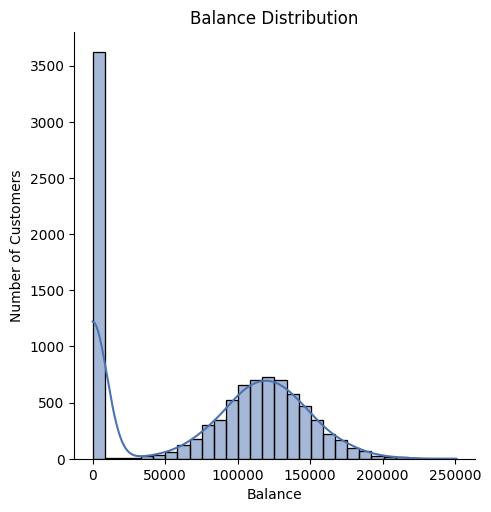

In [ ]:
sns.displot(df,x='Balance',kde=True,bins=30)
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance Distribution')
plt.show()

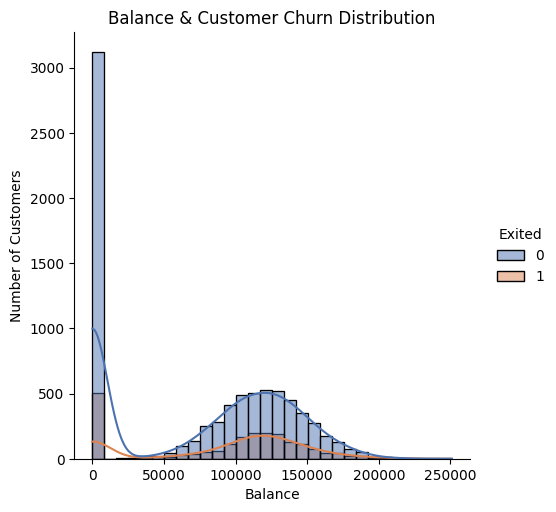

In [ ]:
sns.displot(df,x='Balance',hue='Exited',kde=True,bins=30)
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.title('Balance & Customer Churn Distribution')
plt.show()

In [ ]:
#EstimatedSalary
print(df['EstimatedSalary'].describe())
print('-----------------------------------')
print(df['EstimatedSalary'].value_counts().sort_index())

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64
-----------------------------------
EstimatedSalary
11.58        1
90.07        1
91.75        1
96.27        1
106.67       1
            ..
199909.32    1
199929.17    1
199953.33    1
199970.74    1
199992.48    1
Name: count, Length: 9999, dtype: int64


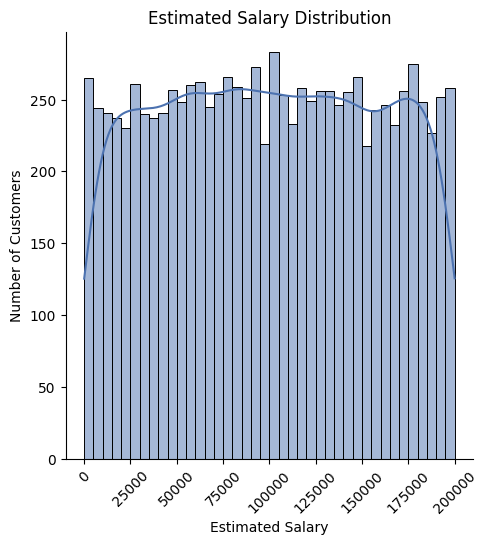

In [ ]:
sns.displot(df,x='EstimatedSalary',kde=True,bins=40)
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary Distribution')
plt.xticks(rotation=45)
plt.show()

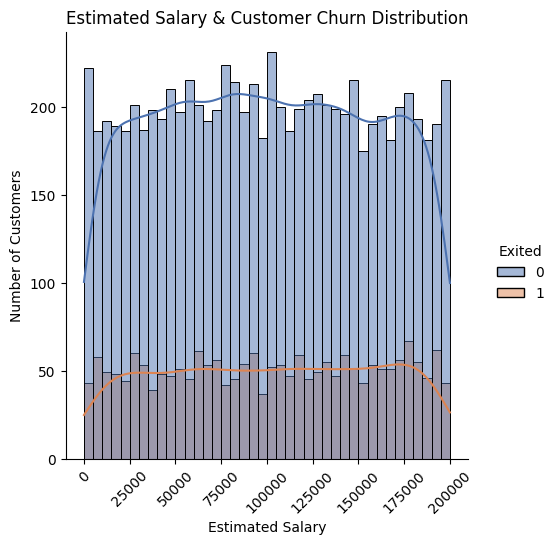

In [ ]:
sns.displot(df,x='EstimatedSalary',hue='Exited',kde=True,bins=40)
plt.xlabel('Estimated Salary')
plt.ylabel('Number of Customers')
plt.title('Estimated Salary & Customer Churn Distribution')
plt.xticks(rotation=45)
plt.show()

Data Transformation

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# drop columns
print('Size of Dataset before dropping columns:',df.shape)
drop_columns = ['RowNumber','CustomerId','Surname']
df.drop(drop_columns, axis=1, inplace=True)
print('Size of Dataset after dropping columns:',df.shape)

Size of Dataset before dropping columns: (10000, 14)
Size of Dataset after dropping columns: (10000, 11)


One Hot Encoding

In [ ]:
categorical_columns = ['Geography','Gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [ ]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


Normalization

In [ ]:
Continuous_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[Continuous_columns] = scaler.fit_transform(df_encoded[Continuous_columns])

df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import xgboost as xgb

In [ ]:
def evaluate_model(y_test,y_pred):
  print('Classification Report')
  print(classification_report(y_test,y_pred))

  print('-----------------------------------------------------')
  # compute Confusion Matrix
  cm = confusion_matrix(y_test,y_pred)

  # create a heatmap of the confusion matrix using seaborn
  sns.heatmap(cm,annot=True, cmap='crest',fmt='.0f')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

Approach 1

* Perform train-test split to separate the data into training and testing sets.
* Apply cross-validation to evaluate multiple models and identify the best-performing one.
* Use the selected model to make predictions on the testing data.
* Note that the dependent variable(Exited) was not balanced during this approach.

In [ ]:
# train test split
X = df_encoded.drop('Exited',axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,False,False,True,True,False


In [ ]:
#list of classifiers
classifiers = [
    ('Logisitc Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random_Forest', RandomForestClassifier()),
    ('Gaussian NB', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGB', xgb.XGBClassifier())
]

for clf_name, clf in  classifiers:
  # perform cross validation
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

  #calculate average performance metrics
  avg_accuracy = scores.mean()
  avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
  avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

  # Print the performance metrics
  print(f'Classifier: {clf_name}')
  print(f'Average Accuracy: {avg_accuracy:.4f}')
  print(f'Average Precision: {avg_precision:.4f}')
  print(f'Average Recall: {avg_recall:.4f}')
  print('-------------------------------------------')

Classifier: Logisitc Regression
Average Accuracy: 0.8110
Average Precision: 0.7169
Average Recall: 0.5860
-------------------------------------------
Classifier: Decision Tree
Average Accuracy: 0.7875
Average Precision: 0.6767
Average Recall: 0.6802
-------------------------------------------
Classifier: Random Forest
Average Accuracy: 0.8600
Average Precision: 0.8176
Average Recall: 0.7102
-------------------------------------------
Classifier: Gaussian NB
Average Accuracy: 0.8109
Average Precision: 0.7029
Average Recall: 0.6496
-------------------------------------------
Classifier: KNN
Average Accuracy: 0.8113
Average Precision: 0.7059
Average Recall: 0.6197
-------------------------------------------
Classifier: XGB
Average Accuracy: 0.8509
Average Precision: 0.7861
Average Recall: 0.7135
-------------------------------------------


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1593
           1       0.90      0.91      0.90      1593

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

-----------------------------------------------------


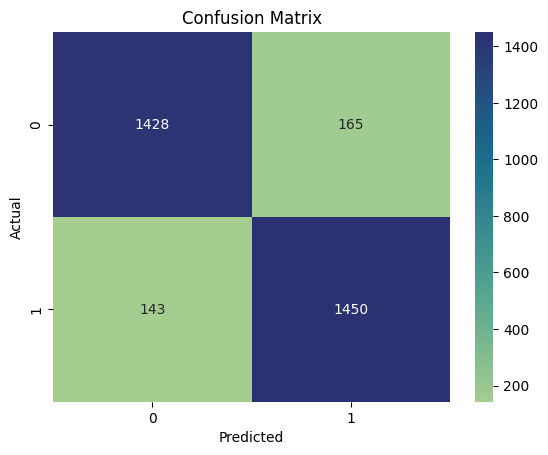

In [ ]:
#creating the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#training the classifier
rf_classifier.fit(X_train, y_train)

# making prediction on test set
y_pred = rf_classifier.predict(X_test)

#evaluating model
evaluate_model(y_test,y_pred)

Approach 2

* Handle the imbalanced data using SMOTE Technique
* Perform train-test split to separate the data into training and testing sets.
* Apply cross-validation to evaluate multiple models and identify the best-performing one.
* Use the selected model to make predictions on the testing data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Exited,
1,7963
0,7963


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 13)
(3186, 13)
(12740,)
(3186,)


In [ ]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('----------------------------------')

Classifier: Logistic Regression
Average Accuracy: 0.7078
Average Precision: 0.7079
Average Recall: 0.7078
----------------------------------
Classifier: Decision Tree
Average Accuracy: 0.8248
Average Precision: 0.8234
Average Recall: 0.8225
----------------------------------
Classifier: Random Forest
Average Accuracy: 0.8874
Average Precision: 0.8880
Average Recall: 0.8881
----------------------------------
Classifier: KNN
Average Accuracy: 0.8229
Average Precision: 0.8325
Average Recall: 0.8229
----------------------------------
Classifier: Gaussion NB
Average Accuracy: 0.7097
Average Precision: 0.7113
Average Recall: 0.7097
----------------------------------
Classifier: XGB
Average Accuracy: 0.8962
Average Precision: 0.8971
Average Recall: 0.8962
----------------------------------


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.93      0.89      0.91      1593

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186

-----------------------------------------------------


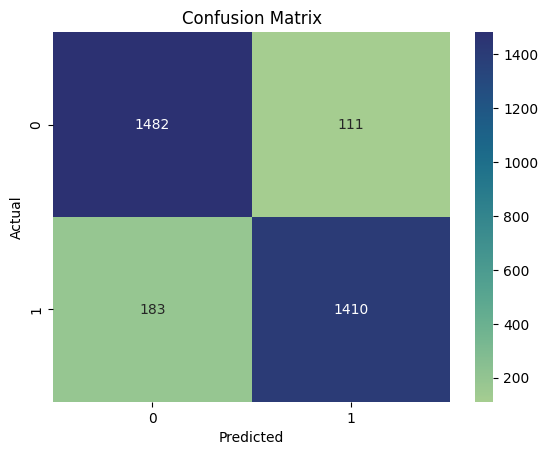

In [ ]:
# Create an XGBClassifier model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Compute Accuracy
evaluate_model(y_test,y_pred)

Conclusion

Balancing the dataset has significantly improved the overall testing data accuracy to 91%. Notably, it has substantially increased the accuracy for churned customers from the bank, elevating it from 56% to 91%. This improvement holds particular significance to us compared to the accuracy for retained customers.